In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/Users/junyuwu/Downloads/train.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
df["Product_Category_2"].fillna(df["Product_Category_2"][1].mean(),inplace=True)

In [6]:
df["Product_Category_3"].fillna(df["Product_Category_3"][1].mean(),inplace=True)

In [7]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,6.0,14.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,6.0,14.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,6.0,14.0,7969


In [9]:
bygender = df["Gender"].value_counts()

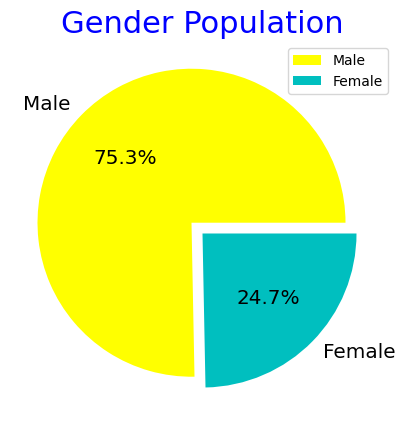

In [10]:
mylabels = ["Male","Female"]
myexplode = [0.1,0]
mycolors = ["yellow", "c"]
plt.figure(figsize=(5,5))
plt.pie(bygender,labels = mylabels, autopct="%.1f%%", explode = myexplode, colors = mycolors, textprops={"size" : "x-large"})
plt.title("Gender Population", color="blue", fontsize=22,loc='center')
plt.legend();

In [11]:
bygender1 = df.groupby("Gender")["Purchase"].sum()
bygender1

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64

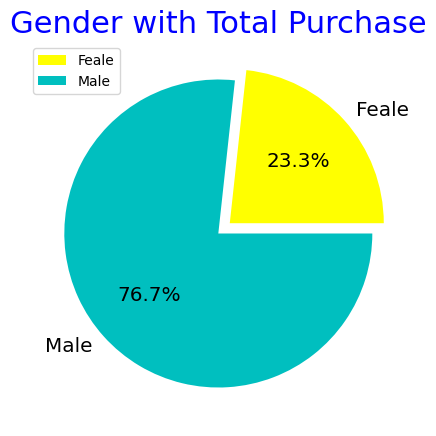

In [12]:
mylabels = ["Feale","Male"]
myexplode = [0.1,0]
mycolors = ["yellow", "c"]
plt.figure(figsize=(5,5))
plt.pie(bygender1,labels = mylabels, autopct="%.1f%%", explode = myexplode, colors = mycolors, textprops={"size" : "x-large"})
plt.title("Gender with Total Purchase", color="blue", fontsize=22,loc='center')
plt.legend();
#Main Customer(Male)

In [13]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,6.0,14.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,6.0,14.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,6.0,14.0,7969


In [14]:
# Analysis about male
male = df["Gender"] == "M"
all_male = df[male]
male_age = all_male.groupby(["Age"])["Purchase"].sum()
male_age


Age
0-17       92527205
18-25     708372833
26-35    1588794345
36-45     783130921
46-50     304136539
51-55     277633647
55+       154984610
Name: Purchase, dtype: int64

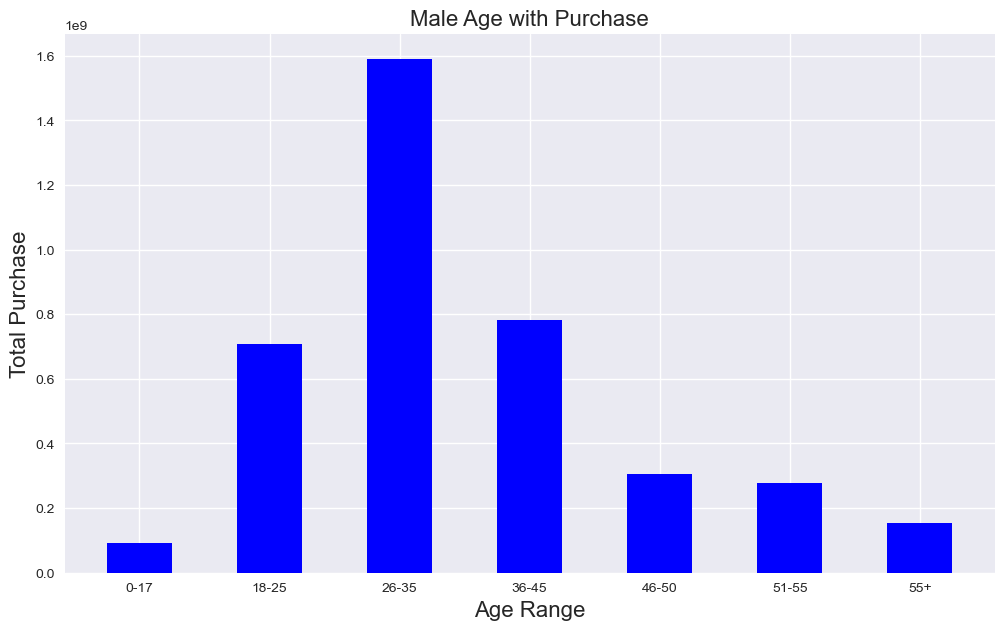

In [15]:
x_axis = male_age.index
y_axis = male_age
plt.figure(figsize=(12, 7))
plt.style.use('seaborn')
plt.bar(x_axis, y_axis, width=0.5, color="blue")
plt.title('Male Age with Purchase',fontsize=16)
plt.xlabel('Age Range',fontsize=16)
plt.ylabel('Total Purchase',fontsize=16);
#Main customer (Male, Age 18-45)

In [16]:
main_cus = df["Age"].isin(["18-25", "26-35", "36-45"])
age_cus = df[main_cus]
male_cus = age_cus["Gender"] == "M"
age_main_male_cus = age_cus[male_cus]
age_main_male_cus

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,14.0,15227
9,1000005,P00274942,M,26-35,20,A,1,1,8,6.0,14.0,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,11.0,14.0,5254
11,1000005,P00014542,M,26-35,20,A,1,1,8,6.0,14.0,3957
12,1000005,P00031342,M,26-35,20,A,1,1,8,6.0,14.0,6073
...,...,...,...,...,...,...,...,...,...,...,...,...
550055,1006019,P00372445,M,26-35,0,A,4+,0,20,6.0,14.0,238
550056,1006022,P00375436,M,26-35,17,C,4+,0,20,6.0,14.0,254
550057,1006023,P00370853,M,26-35,0,C,2,1,19,6.0,14.0,61
550058,1006024,P00372445,M,26-35,12,A,0,1,20,6.0,14.0,121


In [17]:
bymar_sta = age_main_male_cus.groupby("Marital_Status")["Purchase"].sum()
bymar_sta
# Male, age 18-45, single

Marital_Status
0    2016910721
1    1063387378
Name: Purchase, dtype: int64

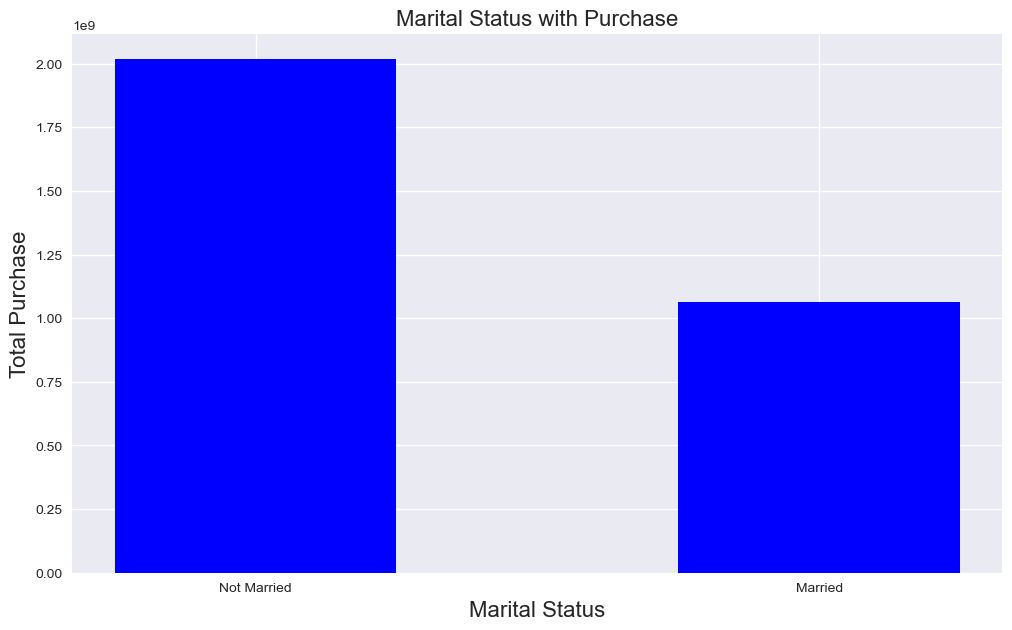

In [18]:
x_axis = ["Not Married", "Married"]
y_axis = bymar_sta
plt.figure(figsize=(12, 7))
plt.style.use('seaborn')
plt.bar(x_axis, y_axis, width=0.5, color="blue")
plt.title('Marital Status with Purchase',fontsize=16)
plt.xlabel('Marital Status',fontsize=16)
plt.ylabel('Total Purchase',fontsize=16);

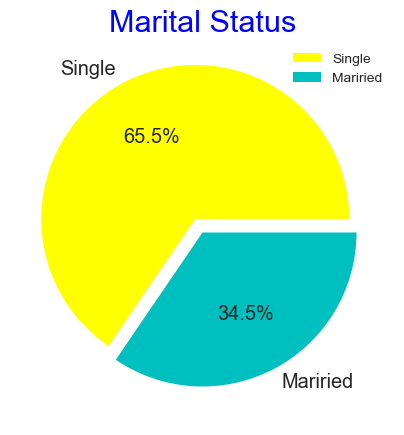

In [19]:
mylabels = ["Single","Mariried"]
myexplode = [0.1,0]
mycolors = ["yellow", "c"]
plt.figure(figsize=(5,5))
plt.pie(bymar_sta,labels = mylabels, autopct="%.1f%%", explode = myexplode, colors = mycolors, textprops={"size" : "x-large"})
plt.title("Marital Status", color="blue", fontsize=22,loc='center')
plt.legend();

In [20]:
byocc = age_main_male_cus.groupby("Occupation")["Purchase"].sum()
byocc

Occupation
0     400041053
1     182836564
2     146801286
3      69728853
4     512204242
5      82641485
6      78818419
7     347395349
8       4416455
9       4133559
10     17012945
11     66701614
12    236646489
13      4068305
14    169328604
15     82419743
16    132918605
17    276152173
18     44239616
19     44598543
20    177194197
Name: Purchase, dtype: int64

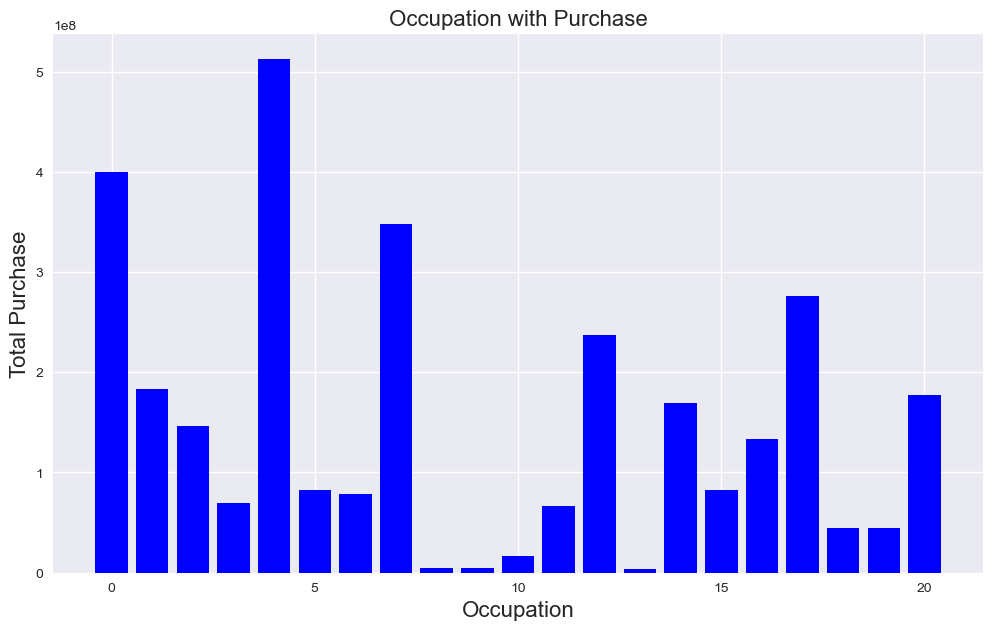

In [21]:
x_axis = byocc.index
y_axis = byocc
plt.figure(figsize=(12, 7))
plt.style.use('seaborn')
plt.bar(x_axis, y_axis, color="blue")
plt.title('Occupation with Purchase',fontsize=16)
plt.xlabel('Occupation',fontsize=16)
plt.ylabel('Total Purchase',fontsize=16);

In [22]:
byocc_5 = byocc.nlargest(3).to_frame()
byocc_5
# Male, age 18-45, single, occupation 4,0,7

,Purchase
Occupation,
4,512204242
0,400041053
7,347395349


In [23]:
bycity_years = age_main_male_cus.groupby("Stay_In_Current_City_Years")["Purchase"].sum()

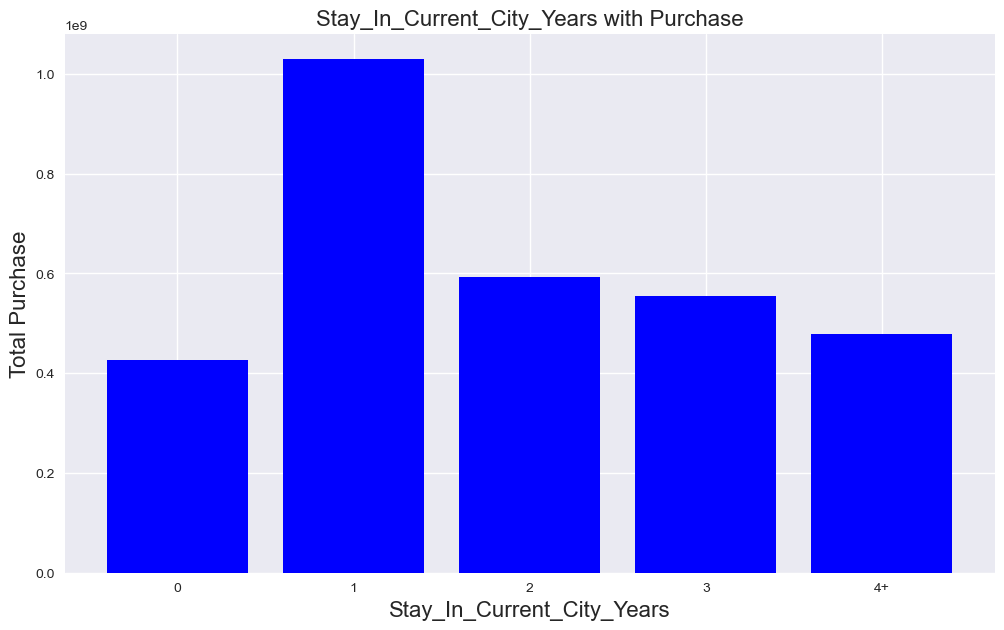

In [24]:
x_axis = bycity_years.index
y_axis = bycity_years
plt.figure(figsize=(12, 7))
plt.style.use('seaborn')
plt.bar(x_axis, y_axis, color="blue")
plt.title('Stay_In_Current_City_Years with Purchase',fontsize=16)
plt.xlabel('Stay_In_Current_City_Years',fontsize=16)
plt.ylabel('Total Purchase',fontsize=16);

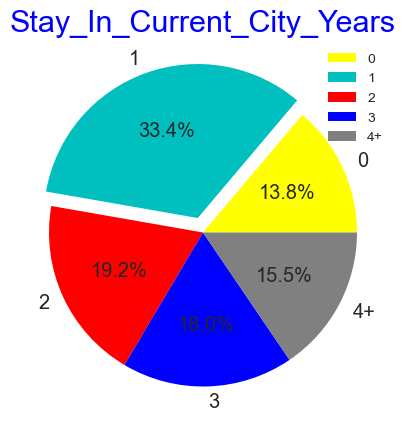

In [25]:
mylabels = bycity_years.index
myexplode = [0,0.1,0,0,0]
mycolors = ["yellow", "c", "red", "blue", "gray"]
plt.figure(figsize=(5,5))
plt.pie(bycity_years,labels = mylabels, autopct="%.1f%%", explode = myexplode, colors = mycolors, textprops={"size" : "x-large"})
plt.title("Stay_In_Current_City_Years", color="blue", fontsize=22,loc='center')
plt.legend();
# Male, age 18-45, single, occupation 4,0,7, stay_in_city_year 1

In [26]:
bycity = age_main_male_cus.groupby("City_Category")["Purchase"].sum()

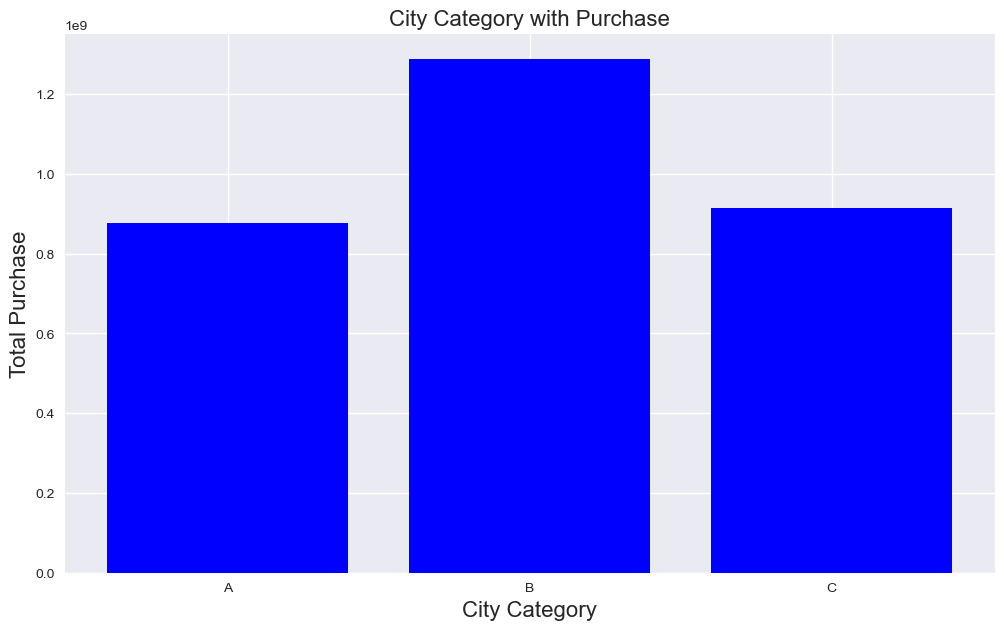

In [27]:
x_axis = bycity.index
y_axis = bycity
plt.figure(figsize=(12, 7))
plt.style.use('seaborn')
plt.bar(x_axis, y_axis, color="blue")
plt.title('City Category with Purchase',fontsize=16)
plt.xlabel('City Category',fontsize=16)
plt.ylabel('Total Purchase',fontsize=16);
# Male, age 18-45, single, occupation 4,0,7, stay_in_city_year 1, City Category B